In [1]:
# imports used in all cells
import gpac
import sympy
import numpy as np

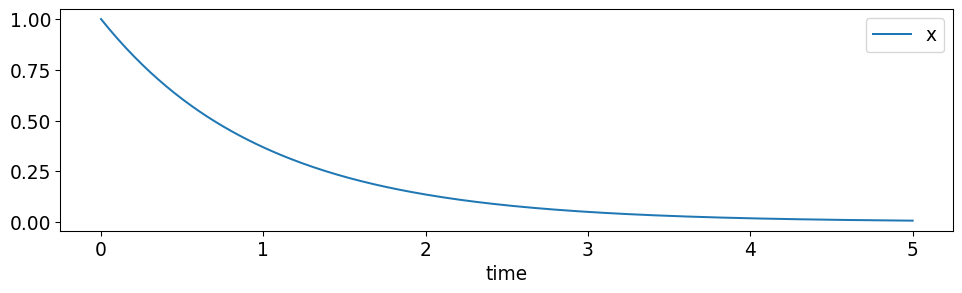

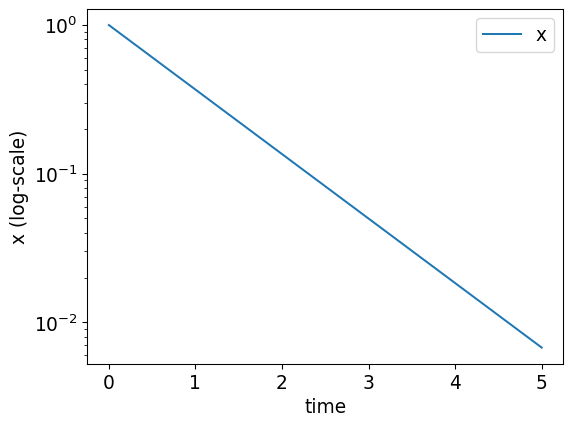

In [2]:
# exponential decay
x, = gpac.symbols('x')          # wrapper for sympy.symbols that always returns a 
                                #   tuple[sympy.Symbol, ...] for better mypy type inference

odes = {x: -x}                  # differential equation  x' = -x
initial_values = {x: 1}         # initial value of x
t_eval = np.linspace(0, 5, 200) # times at which to plot values of x

# This creates the first plot below.
# Need to set parameter show=True (or call plt.show() after this) in order to put display multiple plots in one cell.
gpac.plot(odes, initial_values, t_eval=t_eval, show=True)

# for more control over plotting, call integrate_odes to get solution 
# and plot it directly using matplotlib functions
# the `solution` object below is the same returned from scipy.integrate.solve_ivp:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
# This creates the second plot below with a log-scale y-axis.
solution = gpac.integrate_odes(odes, initial_values, t_eval=t_eval)
import matplotlib.pyplot as plt
from matplotlib import figure
plt.plot(solution.t, solution.y[0], label='x')
plt.legend()
plt.yscale('log')
plt.ylabel('x (log-scale)')
plt.xlabel('time')
plt.show()

times = [0.   0.25 0.5  0.75 1.  ]
a = [10.          4.84701622  0.58753815  0.38765743  3.07392998]
b = [1.         6.84903338 9.63512628 3.03634559 0.38421121]
c = [1.         0.3039504  1.77733557 8.57599698 8.54185881]


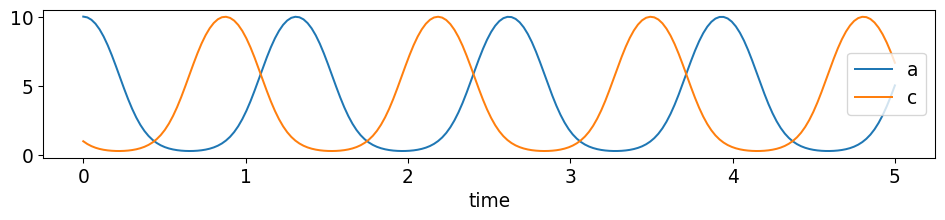

In [3]:
# plot solution to rock-paper-scissors (RPS) oscillator described by these chemical reactions:
# A+B -> 2B
# B+C -> 2C
# C+A -> 2A
a,b,c = sympy.symbols('a b c')

odes = {
    a: -a*b + c*a,
    b: -b*c + a*b,
    c: -c*a + b*c,
}
initial_values = {
    a: 10,
    b: 1,
    c: 1,
}
t_eval = np.linspace(0, 5, 200)

# adjust figure size and plot only trajectories for a and c
gpac.plot(odes, initial_values, t_eval=t_eval, figure_size=(12,2), symbols_to_plot=[a,c])

# print some values along trajectory
t_eval = np.linspace(0, 1, 5)
solution = gpac.integrate_odes(odes, initial_values, t_eval=t_eval)
print(f'times = {solution.t}')
print(f'a = {solution.y[0]}')
print(f'b = {solution.y[1]}')
print(f'c = {solution.y[2]}')

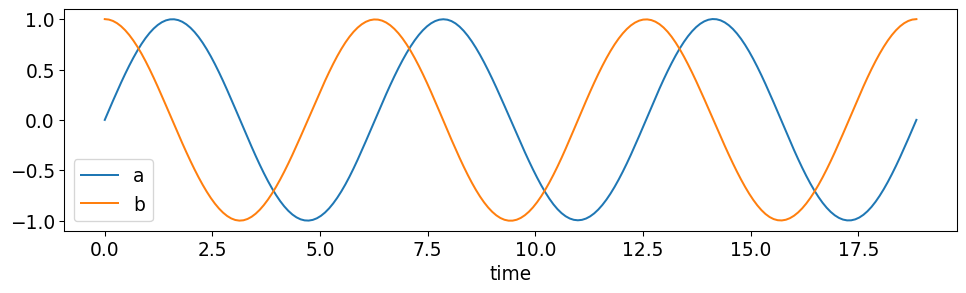

In [4]:
# trick to reference time variable directly in ODEs by introducing new variable t with derivative 1
from sympy import sin, cos
from math import pi

a,b,t = sympy.symbols('a b t')
odes = {
    a: cos(t),
    b: -sin(t),
    t: 1,
}
initial_values = {
    a: 0,
    b: 1,
    t: 0,
}
t_eval = np.linspace(0, 3*2*pi, 200)
# The plotting functions return the result of the underlying simulation (ODE in this case so it's
# an instance of OdeResult from scipy), so if you don't want it shown on the screen when the 
# plot function is the last statement in a cell, assign the return value into a variable like below.
_=gpac.plot(odes, initial_values, t_eval=t_eval, symbols_to_plot=[a,b])

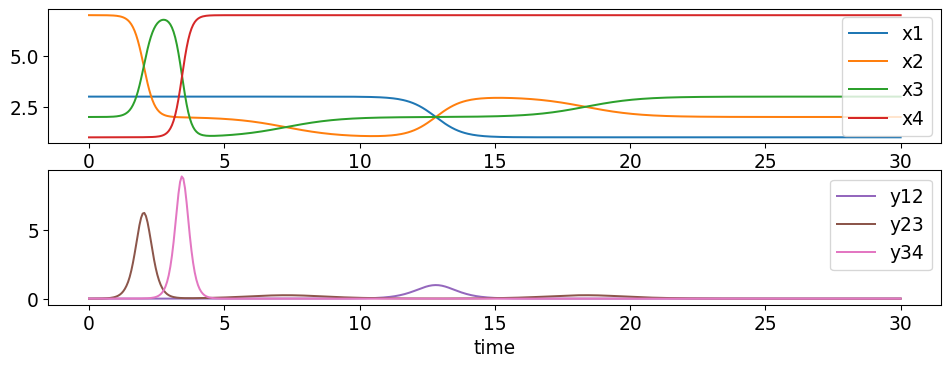

In [5]:
# bubble sort values x1, x2, x3, x4
x1,x2,x3,x4,y12,y23,y34 = sympy.symbols('x1 x2 x3 x4 y12 y23 y34')

odes = {
    x1: -y12,
    x2: -y23+y12,
    x3: -y34+y23,
    x4: y34,
    y12: (x1-x2)*y12,
    y23: (x2-x3)*y23,
    y34: (x3-x4)*y34,
}
eps = 0.001
initial_values = {
    x1: 3,
    x2: 7,
    x3: 2,
    x4: 1,
    y12: eps,
    y23: eps,
    y34: eps,
}
t_eval = np.linspace(0,30,500)
# for clarity, you can pass a 2D list for symbols_to_plot
# each group of symbols will be shown in separate subplots stacked vertically
_=gpac.plot(odes, initial_values, t_eval, figure_size=(12,4), symbols_to_plot=[[x1,x2,x3,x4], [y12, y23, y34]])

None


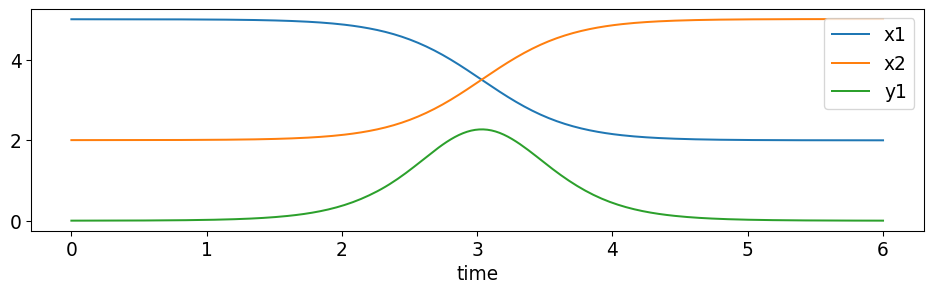

In [6]:
# special case of bubble sort above with only two values x1, x2
# swap values x1,x2 and plot value y1 to see how it spikes during the swap
x1,x2,y1 = sympy.symbols('x1 x2 y1')

odes = {
    x1: -y1,
    x2: y1,
    y1: (x1-x2)*y1,
}
eps = 0.001
initial_values = {
    x1: 5,
    x2: 2,
    y1: eps,
}
t_eval = np.linspace(0,6,200)
# This shows how to get the result from the underlying ODE simulation
solution = gpac.plot(odes, initial_values, t_eval)
print(solution)

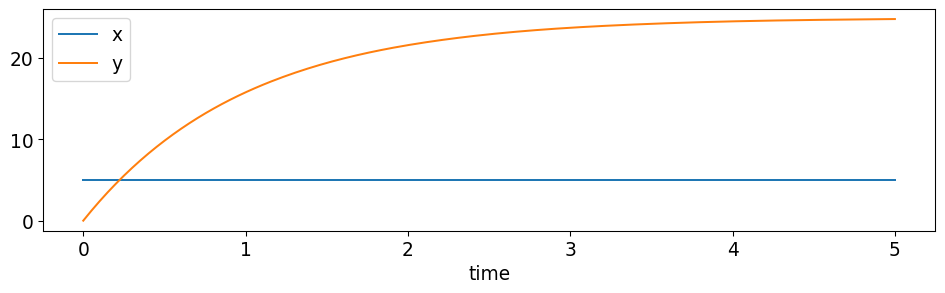

In [7]:
# plot solution to ODEs of this CRN that computes f(x) = x^2, 
#   writing down the ODEs directly
# 2X -> 2X+Y
# Y -> nothing
x,y = sympy.symbols('x y')

odes = {
    x: 0,
    y: x**2 - y,
}
initial_values = {
    x: 5,
}
t_eval = np.linspace(0, 5, 200)

_=gpac.plot(odes, initial_values, t_eval=t_eval)

times = [0.   1.25 2.5  3.75 5.  ]
X = [5. 5. 5. 5. 5.]
Y = [ 0.         17.83557385 22.94880382 24.412418   24.82758534]
ODEs for reactions:
X' = 0
Y' = X**2 - Y


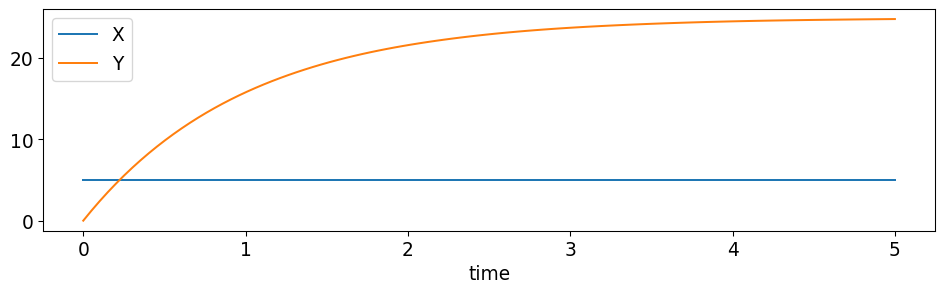

In [8]:
# plot solution to ODEs of this CRN that computes f(x) = x^2,
#   writing down the reactions and letting plot_crn compute the ODEs
# 2X -> 2X+Y
# Y -> nothing
x,y = gpac.species('X Y')

rxns = [
    x+x >> x+x+y,
    y >> gpac.empty,
]
initial_values = {x:5}
t_eval = np.linspace(0, 5, 100)

# plot trajectory of concentrations
gpac.plot_crn(rxns, initial_values, t_eval=t_eval)

# print some values along trajectory
solution = gpac.integrate_crn_odes(rxns, initial_values, t_eval=np.linspace(0, 5, 5))
print(f'times = {solution.t}')
print(f'X = {solution.y[0]}')
print(f'Y = {solution.y[1]}')

# print ODEs associated with reactions
print(f'ODEs for reactions:')
odes = gpac.crn_to_odes(rxns)
for symbol, ode in odes.items():
    print(f"{symbol}' = {ode}")

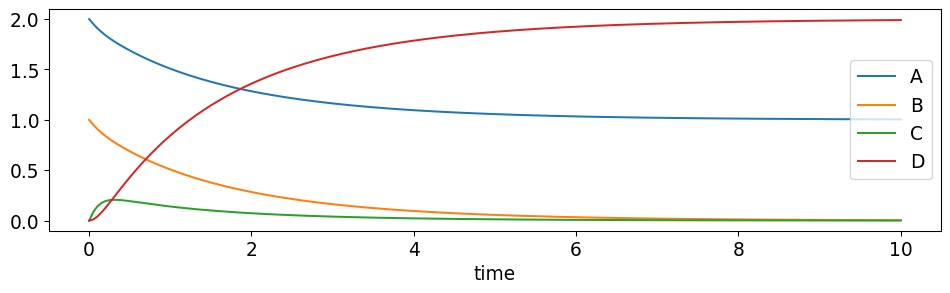

In [9]:
# examples of additional CRN notation
# You can specify reversible reactions, and rate constants in each direction.

# This encodes the CRN
# A+B --0.5--> 2C
#  2C ---4---> A+B
#   C ---5---> D
# The first two reactions are specified as a reversible reaction using | instead of >>
# k means the forward rate constant, r means the reverse rate constant (each is 1.0 if not specified)
a,b,c,d = gpac.species('A B C D')
rxns = [
    (a+b | 2*c).k(0.5).r(4), 
    (c >> d).k(5),
]
initial_values = {a:2, b:1}
t_eval = np.linspace(0, 10, 200)
_=gpac.plot_crn(rxns, initial_values, t_eval=t_eval)

In [10]:
# convert CRN to ODEs
x, y, c = gpac.species('X Y C')
rxns = [
    (x+x >> c).k(1.5),
    (c+x >> c+y).k(0.2),
]
odes = gpac.crn_to_odes(rxns)
for symbol, ode in odes.items():
    print(f"{symbol}' = {ode}")

X' = -0.2*C*X - 3.0*X**2
C' = 1.5*X**2
Y' = 0.2*C*X


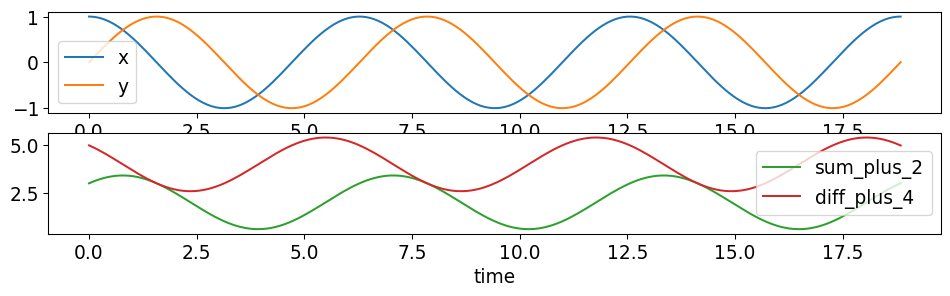

In [11]:
# Dependent variables can be defined that are functions of other variables.

x,y,s,d = sympy.symbols('x y sum_plus_2 diff_plus_4')

# sine/cosine oscillator
# x' = -y
# y' = x
odes = {
    x: -y,
    y: x,
}
inits = {
    x: 1,
    y: 0,
}
from math import pi
t_eval = np.linspace(0, 6*pi, 200)

dependent_symbols = {
    s: x+y+2,
    d: x-y+4,
}

# This shows another way to create multiple subplots:
# set symbols_to_plot to be a list/iterable of re.Patterns
# Unfortunately you need to create re.Pattern objects explicitly and not just 
# pass a list of strings representing regular expressions, since that list
# of strings would be interpreted as the only symbols to plot in one graph.
import re
patterns = [re.compile(r'x|y'), re.compile(r'.*plus.*')]
gpac.plot(odes, inits, t_eval, dependent_symbols=dependent_symbols, symbols_to_plot = patterns)

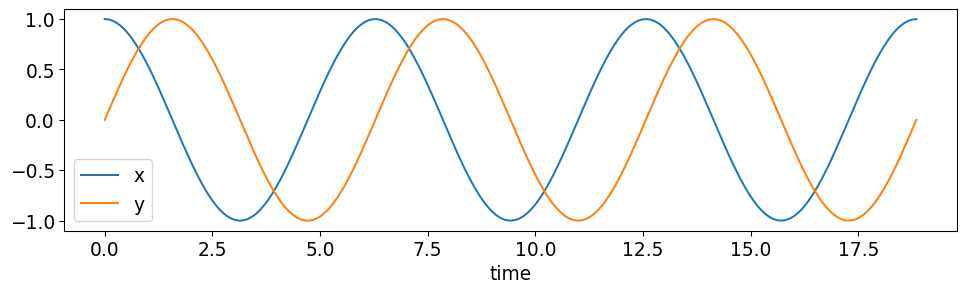

In [12]:
# Dependent variables can be defined that are functions of other variables.
# If used with CRN functions, these should be expressed as functions of sympy symbols 
# with the same names as the corresponding CRN species, 
# e.g., Xp below is a species with name 'Xp' and xp is a symbol, also with name 'Xp'

Xp,Xm,Yp,Ym = gpac.species('Xp Xm Yp Ym')
x,y,xp,xm,yp,ym = sympy.symbols('x y Xp Xm Yp Ym')

# dual-rail CRN implementation of sine/cosine oscillator
# x' = -y
# y' = x
rxns = [
    Yp >> Yp + Xm,
    Ym >> Ym + Xp,
    Xp >> Xp + Yp,
    Xm >> Xm + Ym,
    Xp+Xm >> gpac.empty,
    Yp+Ym >> gpac.empty,
]
# Yp' = Xp
# Ym' = Xm
# ==> (Yp - Ym)' = Xp - Xm
# Xp+Ym >> Xp+Ym + Yp,
# Xm+Yp >> Xm+Yp + Ym,
# Yp' = Xp*Ym
# Ym' = Xm*Yp
# (Yp - Ym)' = Xp*Ym - Xm*Yp
inits = {
    Xp: 1,
    Yp: 0,
}
from math import pi
t_eval = np.linspace(0, 6*pi, 200)

dependent_symbols = {
    x: xp - xm,
    y: yp - ym,
}

# this also shows that symbols_to_plot can be a regular expression describing the symbols
_=gpac.plot_crn(rxns, inits, t_eval, dependent_symbols=dependent_symbols, symbols_to_plot=r'x|y')

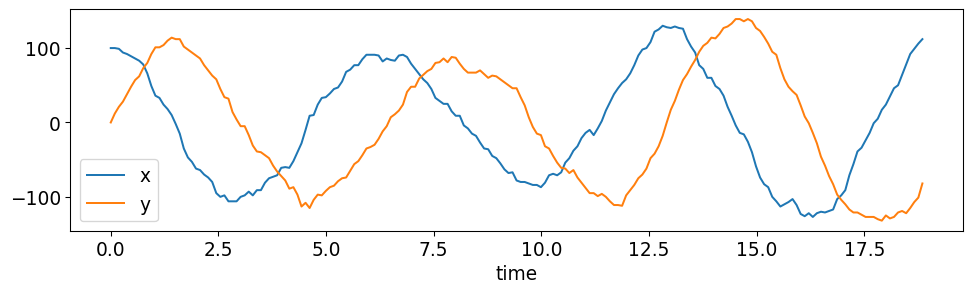

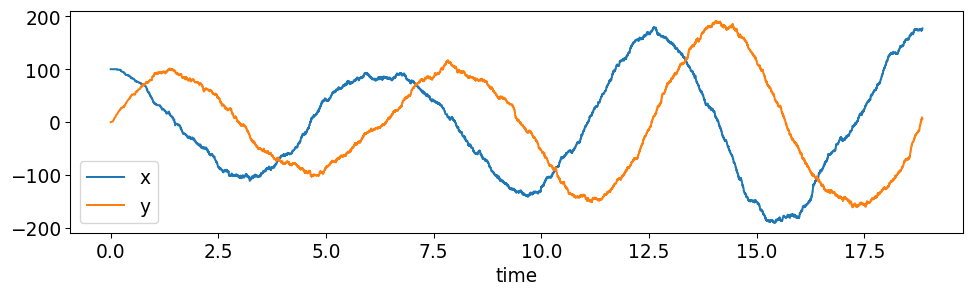

In [13]:
# Same as previous cell, but using discrete counts (Gillespie algorithm)
# in a stochastic simulation instead of ODEs.

Xp,Xm,Yp,Ym = gpac.species('Xp Xm Yp Ym')
x,y,xp,xm,yp,ym = sympy.symbols('x y Xp Xm Yp Ym')

# dual-rail CRN implementation of sine/cosine oscillator
# x' = -y
# y' = x
rxns = [
    Yp >> Yp + Xm,
    Ym >> Ym + Xp,
    Xp >> Xp + Yp,
    Xm >> Xm + Ym,
    Xp+Xm >> gpac.empty,
    Yp+Ym >> gpac.empty,
]
inits = {
    Xp: 100,
    Yp: 0,
}
from math import pi
tmax = 6*pi
nb_steps = 200
seed = 0

dependent_symbols = {
    x: xp - xm,
    y: yp - ym,
}

# the way to specify time is slightly different than other functions
# tmax is the maximum time to run to, and nb_steps is how many evenly-spaced
# points to sample between time 0 and tmax.
# We can specify volume explicitly with parameter `vol`, but if not specified 
# it is set equal to the sum of the initial counts.
gpac.plot_gillespie(rxns, inits, tmax=tmax, nb_steps=nb_steps, seed=seed, 
                    dependent_symbols=dependent_symbols, 
                    symbols_to_plot=r'x|y',
                   )
# if nb_steps is 0, then instead of evenly-spaced time points, every reaction event
# is recorded, and the times given are exponentially-distributed as in Gillespie's algorithm
gpac.plot_gillespie(rxns, inits, tmax=tmax, nb_steps=0, seed=seed, 
                    dependent_symbols=dependent_symbols, 
                    symbols_to_plot=r'x|y',
                   )
# Note that, like plot and plot_crn, plot_gillespie returns the result of the
# underlying discrete simulation, rebop: https://github.com/Armavica/rebop,
# which returns an xarray.Dataset

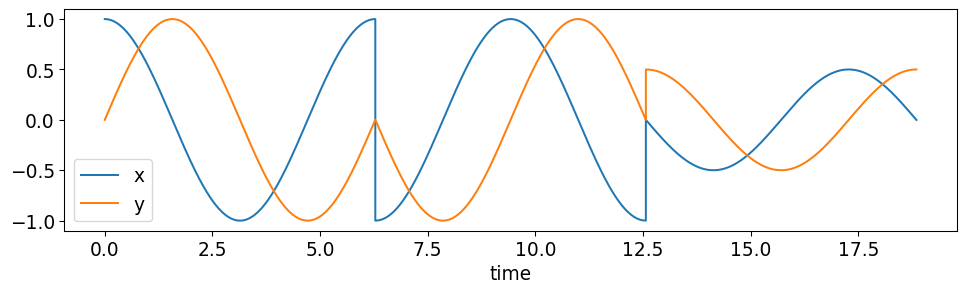

In [14]:
# Shows "resets" parameter available for ODE-related functions. 
# It allows one to step in at pre-defined times and alter the value of variables.
# Below, the sine-cosine oscillator is interrupted at time 2*pi to set x to -1,
# then interrupted again at time 4*pi to set x to 0 and y to 0.5.

import gpac
import numpy as np
import sympy
from math import pi

z = sympy.symbols('z')
x,y = sympy.symbols('x y')
odes = {
    x: -y,
    y: x,
}
inits = {x: 1}
t_eval = np.linspace(0, 6*pi, 1000)
resets = {
    2*pi: { x:-1 },
    4*pi: { x:0, y:0.5 },
}
gpac.plot(odes, inits, t_eval, resets=resets)